# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [2]:
# from mlagents_envs.environment import UnityEnvironment
!pip -q install ./python
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [3]:
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64", worker_id=2, seed=1)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print(type(env))

<class 'unityagents.environment.UnityEnvironment'>


### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]
# print(env.step(1)[brain_name].vector_observations[0])
# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 0.          1.          0.          0.          0.27946243  0.          1.
  0.          0.          0.74556106  0.          0.          1.          0.
  0.48277503  0.          1.          0.          0.          0.30341193
  0.          0.          1.          0.          0.46494457  0.          0.
  1.          0.          0.08466676  0.          1.          0.          0.
  0.95967758  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


below is my code reference :[how to implement rainbow method](https://github.com/Curt-Park/rainbow-is-all-you-need).

In [6]:
from typing import Dict, List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import random
import torch
import torch.optim as optim
from IPython.display import clear_output
from torch.nn.utils import clip_grad_norm_

import rainbow_agent

In [7]:
seed = 1

def seed_torch(seed):
    torch.manual_seed(seed)
    if torch.backends.cudnn.enabled:
        torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.deterministic = True

np.random.seed(seed)
random.seed(seed)
seed_torch(seed)
##env.seed(seed)

# parameters

memory_size = int(1e5)
batch_size = 128
target_update = 32
agent = rainbow_agent.DQNAgent(env, memory_size, batch_size, target_update)

cuda


### 4. Try rainbow method to train agent
 the rainbow_model.py is all AI model that we need 
 
 the rainbow_replaybuffer.py is stored experience of agent
 
 the rainbow_agent.py use to define rainbow agent
 
 (note that I remove backforward action to animate like human vision and reward 0.02 to forward action in order to make agent explore fast. In addition, I judge location after 10 actions avoid agent don't move. When agent don't move, it recieve -0.1 reward)
 

In [8]:
def train(num_frames: int, plotting_interval: int = 300):
    """Train the agent."""
    agent.is_train = True
    env_info = agent.env.reset(train_mode=agent.is_train)[agent.brain_name]
    state = env_info.vector_observations[0]

    update_cnt = 0
    losses = []
    scores = []
    score = 0
    actions = []

    for frame_idx in range(1, num_frames + 1):
        action = np.array([agent.select_action(state)])
        #print(agent.env.step(action)[agent.brain_name])
        next_state, reward, done = agent.step(action)  # send the action to the environment
        
        if action == 0:
            reward += 0.002
        if agent.actions_lr == True:
            reward -= 0.1
        
        
        state = next_state
        score += reward

        # NoisyNet: removed decrease of epsilon

        # PER: increase beta
        fraction = min(frame_idx / num_frames, 1.0)
        agent.beta = agent.beta + fraction * (1.0 - agent.beta)
        # print('\rEpisode {} \t Score'.format(frame_idx, score), end="")
        # if episode ends
        if done:
            ##state = agent.env.reset()
            env_info = agent.env.reset(train_mode=agent.is_train)[agent.brain_name]
            state = env_info.vector_observations[0]
            scores.append(score)
            score = 0

        # if training is ready
        if len(agent.memory) >= 4 * batch_size:
            loss = agent.update_model()
            losses.append(loss)
            update_cnt += 1

            # if hard update is needed
            if update_cnt % agent.target_update == 0:
                agent._target_hard_update()
        
        # plotting
        if frame_idx % plotting_interval == 0:
            """Plot the training progresses."""
            clear_output(True)
            plt.figure(figsize=(20, 5))
            plt.subplot(131)
            plt.title('frame %s. score: %s' % (frame_idx, np.mean(scores[-6:])))
            plt.plot(scores)
            plt.subplot(132)
            plt.title('loss')
            plt.plot(losses)
            plt.show()
            print('\rEpisode {}\tLast Score: {:.2f}'.format(frame_idx, scores[-1]), end="")


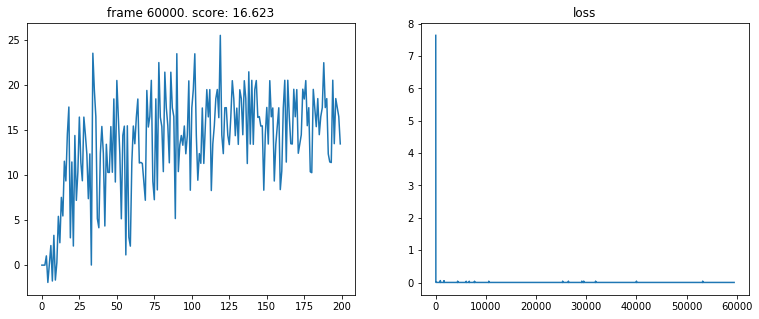

Episode 60000	Last Score: 13.44

In [9]:
train(45000)

### Save model

In [10]:
torch.save({
            'model_state_dict': agent.dqn.state_dict(),
            'optimizer_state_dict': agent.optimizer.state_dict(),
            }, 'checkpoint_fast.pth')

# load model
'''
model = TheModelClass(*args, **kwargs)
optimizer = TheOptimizerClass(*args, **kwargs)
 
checkpoint = torch.load(PATH) @pick device
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

model.eval()
# - or -
# model.train()
'''
'''
# pick device
torch.load('xxx.pkl', map_location='cpu')
torch.load('gen_500000.pkl', map_location=lambda storage, loc: storage.cuda(1))
# - or -
model.load_state_dict(torch.load(PATH, map_location="cuda:0"))

more detail: https://blog.csdn.net/weixin_40522801/article/details/106563354
'''

'\n# pick device\ntorch.load(\'xxx.pkl\', map_location=\'cpu\')\ntorch.load(\'gen_500000.pkl\', map_location=lambda storage, loc: storage.cuda(1))\n# - or -\nmodel.load_state_dict(torch.load(PATH, map_location="cuda:0"))\n\nmore detail: https://blog.csdn.net/weixin_40522801/article/details/106563354\n'

### 4. Test and watch agent

In [11]:
"""load model."""
batch_size = 128
target_update = 32
new_agent = rainbow_agent.DQNAgent(env, memory_size, batch_size, target_update)
checkpoint = torch.load('checkpoint_fast.pth')
new_agent.dqn.load_state_dict(checkpoint['model_state_dict'])
new_agent.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

"""Test the agent."""
new_agent.is_train = False

env_info = new_agent.env.reset(train_mode=new_agent.is_train)[new_agent.brain_name]
state = env_info.vector_observations[0]

done = False
score = 0
step_count = 0

while not done:
    action = np.array([new_agent.select_action(state)])
    #print(agent.env.step(action)[agent.brain_name])
    next_state, reward, done = new_agent.step(action)  # send the action to the environment
    
    state = next_state
    score += reward

print(f"score: {score}, step:{step_count}")

cuda
score: 16.0, step:0


In [12]:
env.close()